In [22]:
import pandas as pd
data=pd.read_csv('twitter_training.csv',header=None)
data.head(20)

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [23]:
# finding total null values and deleting them
data.isnull().sum()

0      0
1      0
2      0
3    686
dtype: int64

In [24]:
#drop null values
data.dropna(inplace=True)
data.shape

(73996, 4)

In [25]:
data.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [26]:
# finding value count of each response in column 2
data[2].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: 2, dtype: int64

In [27]:
# deleting the irrelevent reviews because it will help to find the sentiment
data_2 = data[data[2]!='Irrelevant']
data_2.shape

(61121, 4)

In [28]:
# drop column 0 & 1 for now as it will not be helpfull to find sentiment
data_2.drop(columns=[0,1],inplace=True)
data_2.head()

C:\Users\Umar\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [29]:
# printing a value of new data to check how is sentence defined
data_2.iloc[1000,1]

'Eli Whitney Roth International is making a movie based loosely on using the game,.. bit. ly / on 2wv4KHM'

In [30]:
# importing libraries for data cleaning
from bs4 import BeautifulSoup 
import re
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# removing not and no from stop words as we need them for our model training
stopwords = stopwords.words("english")
stopwords.remove('not')
stopwords.remove('no')

# intializing method for lemmatizing words
lemmatizer = WordNetLemmatizer()

# now creating funtion to clean our data
def cleaned_review(review):
    # remove any html tags
    new_review = BeautifulSoup(review).get_text()
    
    # remove urls from reviews
    no_urls = new_review.replace('http\S+', '').replace('www\S+', '')
    
    # remove any non-letters
    clean_review = re.sub("[^a-zA-Z]", " ", no_urls)
    
    # convert whole sentence to lowercase and split
    new_words = clean_review.lower().split()
    
    # converting stopwords list to set for faster search
    stops = set(stopwords)
    
    # using stopwords to remove irrelavent words and lemmatizing the final output
    final_words = [lemmatizer.lemmatize(word) for word in new_words if not word in stops]
    
    # return the final result
    return (" ".join(final_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Umar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Umar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Umar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# now we will use our funtion to get cleaned data and no. of words
data_2['msg'] = data_2[3].apply(lambda x:cleaned_review(x))

C:\Users\Umar\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: " . .  .  .  .  .  " looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Umar\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "........" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Umar\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "......" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Umar\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: " .  " looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Umar\anaconda3\lib\site-packages\bs4\__

<ipython-input-32-491280ee73d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['n_words'] = data_2['msg'].apply(lambda x:len(x.split()))


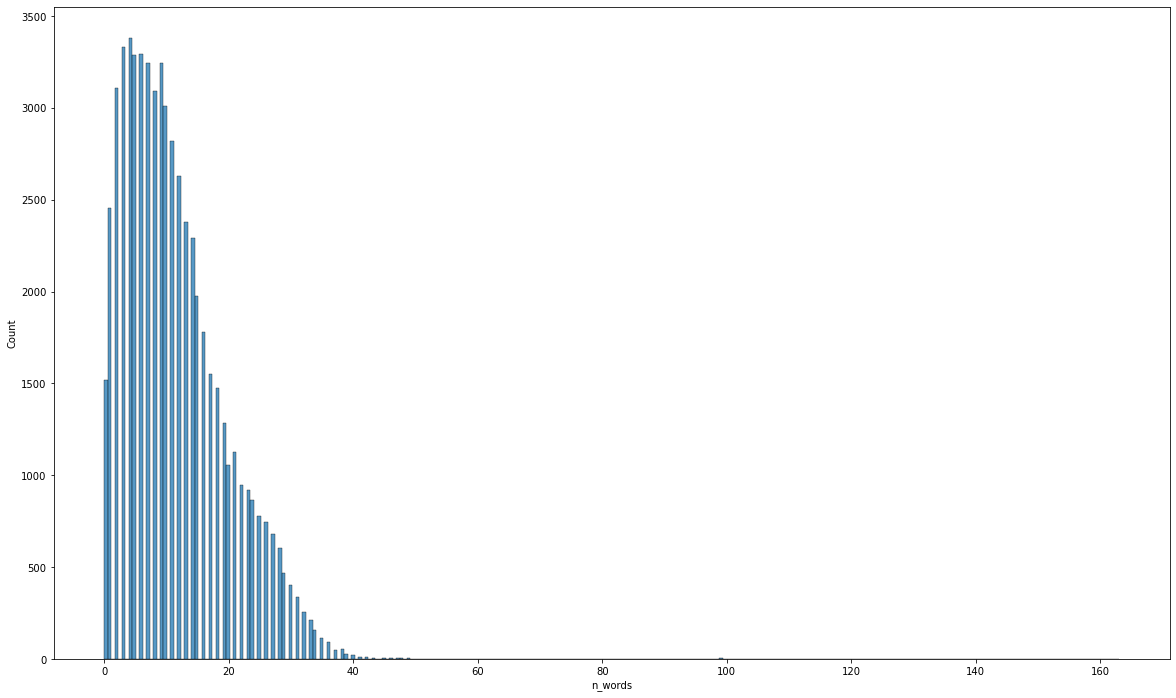

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 12))
# finding ideal length to use for further process
data_2['n_words'] = data_2['msg'].apply(lambda x:len(x.split()))
sns.histplot(data = data_2, x='n_words')
plt.show()

In [33]:
# so we see above that max no.of words in each sentence is 40
max_len = 40

In [34]:
# now we need to one_hot encode the reviews
sentiment = pd.get_dummies(data_2[2])
data_3 = pd.concat([data_2,sentiment],axis=1)
data_3.head()

,2,3,msg,n_words,Negative,Neutral,Positive
0,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder,4,0,0,1
1,Positive,I am coming to the borders and I will kill you...,coming border kill,3,0,0,1
2,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill,4,0,0,1
3,Positive,im coming on borderlands and i will murder you...,im coming borderland murder,4,0,0,1
4,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder,4,0,0,1


In [35]:
# drop columns no longer needed 
data_3.drop(columns=[2,3,'n_words'],inplace=True)


In [36]:
data_3

,msg,Negative,Neutral,Positive
0,im getting borderland murder,0,0,1
1,coming border kill,0,0,1
2,im getting borderland kill,0,0,1
3,im coming borderland murder,0,0,1
4,im getting borderland murder,0,0,1
...,...,...,...,...
74677,realized window partition mac like year behind...,0,0,1
74678,realized mac window partition year behind nvid...,0,0,1
74679,realized window partition mac year behind nvid...,0,0,1
74680,realized window partition mac like year behind...,0,0,1


In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# now we will tokenize the words to sequence so that our model can understand
# we will also pad the sentences with less than 40 words to make size of each sentence equal
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_3['msg'].values)
sequences = tokenizer.texts_to_sequences(data_3['msg'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=max_len, padding='post')

Found 23091 unique tokens.


In [40]:
# lets see how is our output
# here 0's at ending are defined due to the padding
X[1000]

array([ 2107, 18661,  4716,  1599,   227,   495,   371, 17624,   298,
           1,   179,   192,  4724,  7703,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0])

In [41]:
X

array([[  208,    96,    56, ...,     0,     0,     0],
       [  287,  1905,   218, ...,     0,     0,     0],
       [  208,    96,    56, ...,     0,     0,     0],
       ...,
       [ 1960,   375, 10450, ...,     0,     0,     0],
       [ 1960,   375, 10450, ...,     0,     0,     0],
       [    4,   375, 10450, ...,     0,     0,     0]])

In [46]:
y=data_3[["Negative","Neutral","Positive"]]
y

,Negative,Neutral,Positive
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
74677,0,0,1
74678,0,0,1
74679,0,0,1
74680,0,0,1


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)

In [48]:
X = tfidf.fit_transform(data_3['msg']).toarray()
featureNames = tfidf.get_feature_names()

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20,random_state=42)

In [57]:
featureNames

['abandon',
 'ability',
 'able',
 'absolute',
 'absolutely',
 'ac',
 'access',
 'accidentally',
 'according',
 'account',
 'accused',
 'achievement',
 'across',
 'act',
 'action',
 'activision',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'addicted',
 'adding',
 'addition',
 'additional',
 'address',
 'admit',
 'adventure',
 'advertising',
 'advice',
 'aesthetic',
 'af',
 'afk',
 'afraid',
 'afternoon',
 'age',
 'ago',
 'agree',
 'ah',
 'ahead',
 'ai',
 'aid',
 'aim',
 'air',
 'ak',
 'aka',
 'al',
 'album',
 'alert',
 'alexa',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'alot',
 'alpha',
 'already',
 'alright',
 'also',
 'although',
 'always',
 'amazing',
 'amazon',
 'amd',
 'america',
 'american',
 'amid',
 'among',
 'amount',
 'amzn',
 'ancient',
 'android',
 'angry',
 'animal',
 'animation',
 'anna',
 'anniversary',
 'announce',
 'announced',
 'announcement',
 'annoyed',
 'annoying',
 'another',
 'answer',
 'anti',
 'anybody',
 'anymore',
 'anyone',
 'anything',
 'an

In [49]:

X_train.shape,X_test.shape

((61101, 2500), (20, 2500))

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
DTC=DecisionTreeClassifier()

In [52]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
DTC.predict(X_test)

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [56]:
DTC.score(X_test,y_test)

0.9